In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
from scipy import stats
#from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sk

In [2]:
from pandas import read_csv

In [3]:
df = read_csv('Fulldata.csv')

# Pre-Processing

In [4]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [5]:
df.describe()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,135973.000000,135973.000000,135973.000000,1.359730e+05,1.359730e+05,135973.000000,135973.000000,135973.000000,135973.000000,135973.000000,...,135973.000000,135973.000000,135973.000000,135973.000000,135973.000000,135973.000000,135973.000000,135973.000000,135973.000000,135973.000000
mean,282.887801,32.333794,2.547800,4.271899e+04,1.847135e+04,0.000221,0.021681,0.000147,0.196230,0.002692,...,183.058923,117.417524,0.527458,0.083426,0.147260,0.031628,0.270608,0.265195,0.127471,0.128325
std,2538.078860,16.439942,1.141178,5.650402e+06,3.870581e+06,0.014852,0.247276,0.016271,2.077044,0.059601,...,98.867370,110.941664,0.448571,0.191234,0.308886,0.111069,0.437163,0.438166,0.314868,0.327617
min,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,84.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,25.000000,2.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,66.000000,0.550000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,50.000000,4.000000,2.760000e+02,5.340000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,57715.000000,70.000000,11.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Label Encoding

In [6]:
df["protocol_type"] = df["protocol_type"].astype('category')


In [7]:
df["protocol_type"] = df["protocol_type"].cat.codes


In [8]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

# Random Selection of 3000 rows from a Data-Set

In [9]:
df1=df.take(np.random.permutation(len(df))[:3000])

In [10]:
df1.shape

(3000, 42)

In [11]:
# Target Variable

y = df1['xAttack']

In [12]:
# Feature Set

x = df1.drop('xAttack',1)

In [13]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
from sklearn.neural_network import MLPClassifier

# Normalization of Feature Set

In [16]:
from sklearn import preprocessing

In [17]:
normalized_df2 = preprocessing.normalize(x)

# Spliting of Test and Train Data in 8:2 

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
X_train, X_test, y_train, y_test = train_test_split(normalized_df2, y, test_size=0.2, random_state=0)

In [20]:
import sklearn.metrics as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [21]:
# Puting df1 in a test.csv File to give as an input to the knn
df1.to_csv("test.csv")

# knn Implementation

In [22]:
import csv
import random
import math
import operator
 
def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        dataset = dataset[1:]
        for x in range(len(dataset)):
            for y in range(42):         # 0 to 7 , the numeric values only
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])
 
 
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)
 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))     # Sort distances in ascending order
    neighbors = []
    for x in range(k):                             # k nearest neighbors
        neighbors.append(distances[x][0])
    return neighbors
 
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]
 
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

trainingSet=[]
testSet=[]
split = 0.67
loadDataset('test.csv', split, trainingSet, testSet)
print('Train set: ' + repr(len(trainingSet)))
print('Test set: ' + repr(len(testSet)))
# generate predictions
predictions=[]
k = 3
for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], k)
    result = getResponse(neighbors)
    predictions.append(result)
accuracy = getAccuracy(testSet, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Train set: 2018
Test set: 982
Accuracy: 70.67209775967413%


# Algorithm Comparision using BoxPlot

LR: 0.857000 (0.018586)
KNN: 0.945000 (0.009690)
CART: 0.967333 (0.009286)
NB: 0.555333 (0.035814)
SVM: 0.828667 (0.020396)
RF: 0.979333 (0.006799)
MLP: 0.943667 (0.011000)


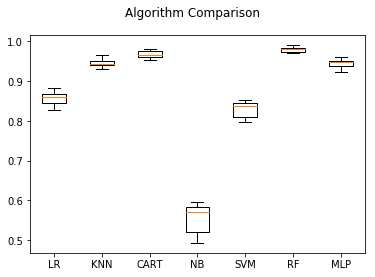

In [30]:
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF',RandomForestClassifier(n_jobs=1000, random_state=10,n_estimators=10) ))
models.append(('MLP',MLPClassifier(solver='lbfgs', alpha=1e-7,hidden_layer_sizes=(30,), random_state=0)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, normalized_df2, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Algorithm Comparision using Bar Graph

In [24]:
MLA = [
    #Ensemble Methods
    RandomForestClassifier(n_jobs=1000, random_state=10,n_estimators=10),    
    #GLM
    LogisticRegression(),
    MLPClassifier(solver='lbfgs', alpha=1e-7,hidden_layer_sizes=(30,), random_state=0),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
   #tree.ExtraTreeClassifier(),
    
    ]

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve

In [26]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    predicted = alg.fit(X_train, y_train).predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    row_index = row_index+1

In [27]:
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy
0,RandomForestClassifier,0.9992,0.9783
2,MLPClassifier,0.9646,0.9600
6,DecisionTreeClassifier,1.0000,0.9567
4,KNeighborsClassifier,0.9604,0.9450
1,LogisticRegression,0.8483,0.8717
5,SVC,0.8217,0.8483
3,GaussianNB,0.5446,0.5850


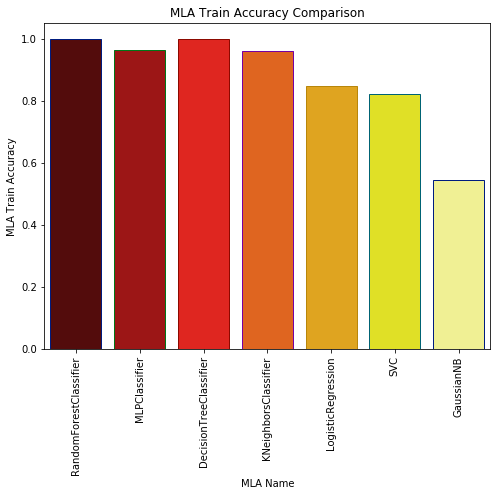

In [28]:

plt.subplots(figsize=(8,6))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()


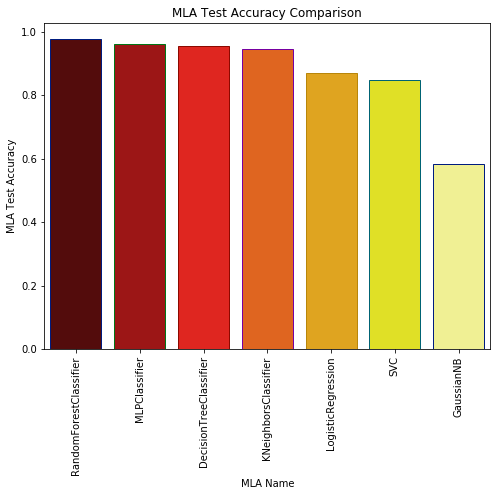

In [29]:
plt.subplots(figsize=(8,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

# Conclusion:

Random Forest Algorithm Gives the best Accuracy For the data Set that we have choosen. RandomForest will work in any case because we are picikng 3000 random samplaes inorder to verify and comapare algorithms 